<a href="https://colab.research.google.com/github/riddhigarg26/Beer-Volume/blob/main/BeerVolume_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
df = pd.read_excel('/content/BeerVol.xlsx')
df.dropna(inplace= True)

In [ ]:
df = df[['Period', 'Volume_KHL']]
df.head()

,Period,Volume_KHL
0,2018-01-01,1428.628676
1,2018-02-01,1105.987315
2,2018-03-01,989.255486
3,2018-04-01,898.527092
4,2018-05-01,746.152541


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
120,2019-01-01,1340.715856
121,2019-02-01,1153.592669
122,2019-03-01,1110.424278
123,2019-04-01,901.237691
124,2019-05-01,776.311703


**Plotting the seasonal graph**

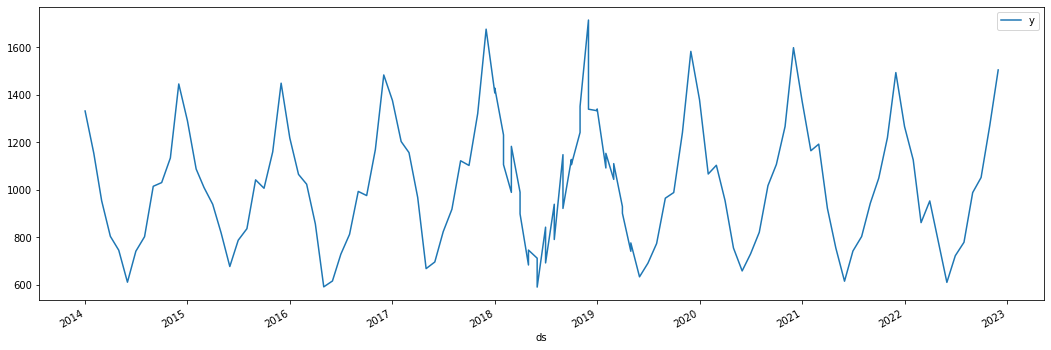

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

125

In [ ]:
df['ds'].max()

Timestamp('2022-12-01 00:00:00')

In [ ]:
df['ds'].max()

Timestamp('2022-12-01 00:00:00')

**Train test split**

In [ ]:
train = df.iloc[:len(df)-30]
test = df.iloc[len(df)-30:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=730) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
820,2024-11-26,1017.875295,1497.627710,1621.773553,1017.412834,1018.304788,543.051334,543.051334,543.051334,543.051334,543.051334,543.051334,0.0,0.0,0.0,1560.926629
821,2024-11-27,1017.880752,1493.484618,1623.091388,1017.417050,1018.310669,541.366082,541.366082,541.366082,541.366082,541.366082,541.366082,0.0,0.0,0.0,1559.246834
822,2024-11-28,1017.886208,1489.351400,1615.870754,1017.421296,1018.316549,533.305472,533.305472,533.305472,533.305472,533.305472,533.305472,0.0,0.0,0.0,1551.191680
823,2024-11-29,1017.891664,1477.925838,1604.508572,1017.425572,1018.322430,519.160425,519.160425,519.160425,519.160425,519.160425,519.160425,0.0,0.0,0.0,1537.052089
824,2024-11-30,1017.897120,1453.942576,1586.631497,1017.429922,1018.328311,499.396355,499.396355,499.396355,499.396355,499.396355,499.396355,0.0,0.0,0.0,1517.293476


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
820,2024-11-26,1560.926629,1497.627710,1621.773553
821,2024-11-27,1559.246834,1493.484618,1623.091388
822,2024-11-28,1551.191680,1489.351400,1615.870754
823,2024-11-29,1537.052089,1477.925838,1604.508572
824,2024-11-30,1517.293476,1453.942576,1586.631497


In [ ]:
test.tail()

,ds,y
120,2019-01-01,1340.715856
121,2019-02-01,1153.592669
122,2019-03-01,1110.424278
123,2019-04-01,901.237691
124,2019-05-01,776.311703


**Plotting the predicted data**

In [ ]:
plot_plotly(m ,forecast)


In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse


In [ ]:
predictions = forecast.iloc[-30:]['yhat']


In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  379.65653788678156
Mean Value of Test Dataset: 1104.4220068560269
